In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "simple_white"
pio.renderers.default = "png"

from experiments.datasets.imbalancing import *
from experiments.datasets.cifar import CIFAR10

In [2]:
cifar = CIFAR10("../data")
dataset = cifar.train_data()

Files already downloaded and verified


In [72]:
subsets = split_with_label_distribution_skew(dataset, 1, 300)
lengths = list(map(len, subsets))

In [73]:
lengths.sort()

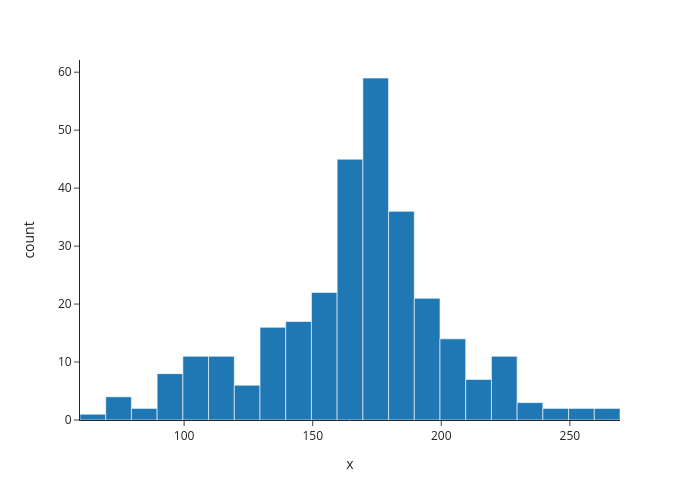

In [74]:
px.histogram(x=lengths)

In [75]:
def get_label_counts(subset):
    labels = [subset[i][1].argmax().item() for i in range(len(subset))]
    return np.histogram(labels)[0]

In [76]:
subset_label_counts = np.array([get_label_counts(s) for s in subsets])

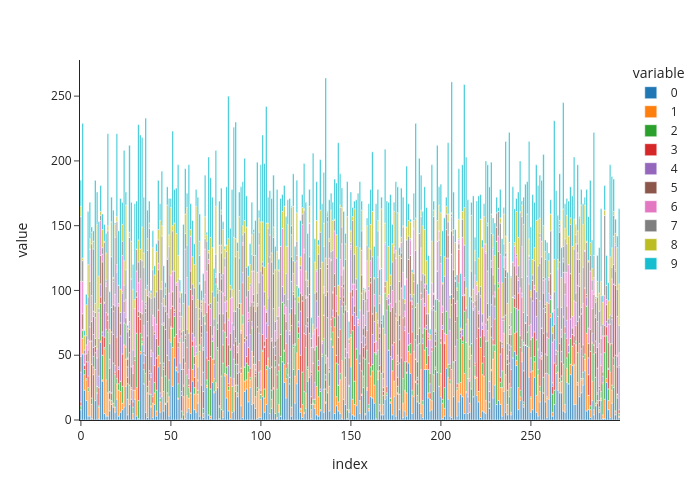

In [77]:
px.bar(subset_label_counts)